# Phase 3: Asking meaningful questions that need to be answered

Cài đặt thêm thư viện ipynb để có thể import các variable từ các file notebook khác

In [87]:
! pip install ipynb

In [88]:
import sys  
sys.path.insert(0, '../phase_1_data_collection')
sys.path.insert(0, '../phase_2_data_exploration')

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
%store -r df_titles
%store -r df_credits

df_titles = df_titles
df_credits = df_credits

In [95]:
df_titles.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,main_production_countries,main_genre
0,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",US,26.0,tt0850645,8.6,1092.0,15.424,7.6,US,comedy
1,tm19248,The General,MOVIE,1926,NONE,78,"action, drama, war, western, comedy, european",US,0.0,tt0017925,8.2,89766.0,8.647,8.0,US,action
2,tm82253,The Best Years of Our Lives,MOVIE,1946,NONE,171,"romance, war, drama",US,0.0,tt0036868,8.1,63026.0,8.435,7.8,US,romance
3,tm83884,His Girl Friday,MOVIE,1940,NONE,92,"comedy, drama, romance",US,0.0,tt0032599,7.8,57835.0,11.270,7.4,US,comedy
4,tm56584,In a Lonely Place,MOVIE,1950,NONE,94,"thriller, drama, romance",US,0.0,tt0042593,7.9,30924.0,8.273,7.6,US,thriller


In [96]:
df_credits.head()

,id,name,character,role
0,ts20945,Joe Besser,Joe,ACTOR
1,ts20945,Moe Howard,Moe,ACTOR
2,ts20945,Larry Fine,Larry,ACTOR
3,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [99]:
df_data = df_titles.merge(df_credits, on='id', how='inner')
df_data.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,main_production_countries,main_genre,name,character,role
0,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",US,26.0,tt0850645,8.6,1092.0,15.424,7.6,US,comedy,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",US,26.0,tt0850645,8.6,1092.0,15.424,7.6,US,comedy,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",US,26.0,tt0850645,8.6,1092.0,15.424,7.6,US,comedy,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,1926,NONE,78,"action, drama, war, western, comedy, european",US,0.0,tt0017925,8.2,89766.0,8.647,8.0,US,action,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,1926,NONE,78,"action, drama, war, western, comedy, european",US,0.0,tt0017925,8.2,89766.0,8.647,8.0,US,action,Marion Mack,Annabelle Lee,ACTOR


### 1. Which genres have the highest ratings (based on imdb & tmdb score) of last 10 years?

In [133]:
genre_score = df_data[df_data['release_year'] >= 2012].loc[:, ['main_genre', 'imdb_score', 'tmdb_score']].drop_duplicates().reset_index(drop=True)
genre_score = genre_score[genre_score['main_genre'] != '']
genre_score

,main_genre,imdb_score,tmdb_score
0,crime,8.7,8.2
1,drama,7.4,7.0
2,thriller,7.4,7.0
3,thriller,7.8,7.2
4,scifi,7.0,6.5
...,...,...,...
6867,reality,6.1,NaN
6868,romance,6.0,7.5
6869,romance,4.4,5.3
6870,drama,4.2,7.3


In [134]:
genre_score['avg_score'] = genre_score.loc[:, ['imdb_score', 'tmdb_score']].mean(axis=1)
genre_score

,main_genre,imdb_score,tmdb_score,avg_score
0,crime,8.7,8.2,8.45
1,drama,7.4,7.0,7.20
2,thriller,7.4,7.0,7.20
3,thriller,7.8,7.2,7.50
4,scifi,7.0,6.5,6.75
...,...,...,...,...
6867,reality,6.1,NaN,6.10
6868,romance,6.0,7.5,6.75
6869,romance,4.4,5.3,4.85
6870,drama,4.2,7.3,5.75


In [135]:
genre_score_table = pd.pivot_table(genre_score, values='avg_score', index='main_genre', aggfunc=np.mean)
genre_score_table

,avg_score
main_genre,
action,6.218838
animation,6.752659
comedy,6.153648
crime,6.600725
documentation,6.872821
drama,6.469880
european,6.000000
family,6.335972
fantasy,6.210525


<AxesSubplot:ylabel='main_genre'>

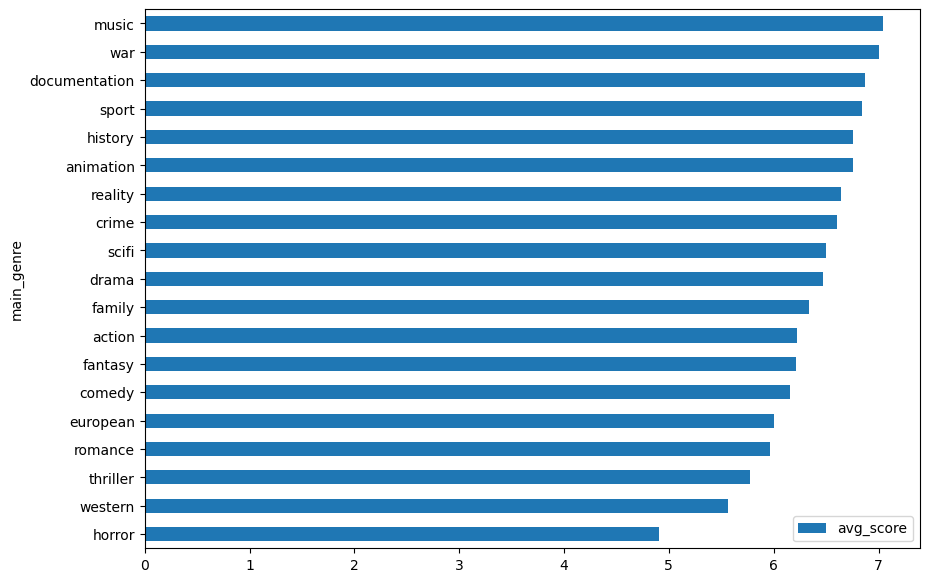

In [136]:
genre_score_table.sort_values(by='avg_score').plot.barh(figsize=(10, 7))